# O Pêndulo Simples Não Linear

    A equação diferencial usada para modelar o movimento de um pêndulo no plano pode ser derivada usando a lei do movimento de Newton

    

$$ \frac{d²\theta}{dt²}+\frac{g}{l}\sin(\theta)..................................(1) $$ 

onde θ é o deslocamento angular da vertical, l é o comprimento da corda do pêndulo, que oscila no plano e g é a aceleração devido à gravidade.

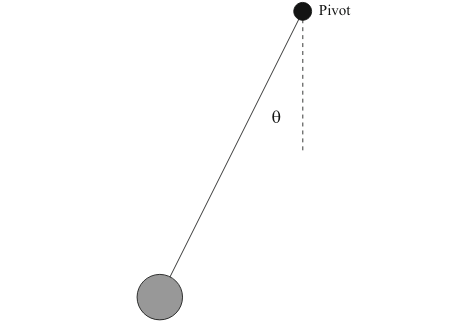

Seja θ̇ = φ. Então, equação (1) pode ser escrito como um sistema planar na forma

 $$ \frac{d\theta}{dt} = \phi,  \ \frac{d\phi}{dt} = -\frac{g}{l}\sin\theta..............(2)$$ 

A equação (2) é um sistema hamiltoniano (energia cinética + energia potencial), e portanto as curvas de solução podem ser traçadas.


$$ H(\theta/\phi) = \frac{\phi²}{2} - \frac{g}{l}\cos\theta  $$

Os eixos são o deslocamento angular (θ) e a velocidade angular (θ̇). As curvas fechadas em torno dos pontos críticos (2nπ, 0) representam oscilações periódicas, e as linhas onduladas para grandes velocidades angulares

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-4.0, 4.0, )

In [82]:
X, Y = np.meshgrid(xlist, ylist)
Z = Y ** 2 / 2 - 5 * np.cos(X)

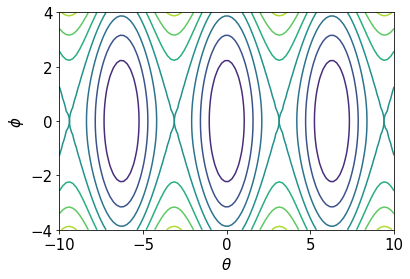

In [83]:
plt.figure()
plt.contour(X, Y, Z)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$\phi$', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [84]:
from mpl_toolkits.mplot3d import Axes3D

In [85]:
def fun(x, y):
    return y ** 2 / 2 - 5 * np.cos(x)

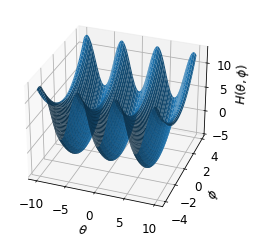

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-4.0, 4.0, 0.1)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$\phi$', fontsize=12)
ax.set_zlabel(r'$H(\theta,\phi)$', fontsize=12)
plt.tick_params(labelsize=12)
ax.view_init(30, -70)
plt.show()

correspondem a movimentos nos quais o pêndulo gira em torno de seu ponto central. As curvas fechadas correspondem aos mínimos locais na superfície Z = 𝐻(𝜃/𝜙), e os pontos críticos instáveis correspondem aos máximos locais na mesma superfície.

# The Rossler chaotic attractor
Otto Eberhard Rössler é um bioquímico alemão conhecido por seu trabalho sobre a teoria do caos e a equação teórica conhecida como atrator de Rössler.
Um sistema caótico de uma equação (4). 
Nesse caso, solução é o EDO

$$ \frac{dx}{dt} = -(y+z), \frac{dy}{dt}=x+ay, \frac{dz}{dt}=b+xz-cz ..........(4)$$

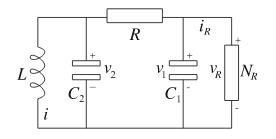

In [87]:
def Rossler(x, y, z, a = 0.2, b=0.2, c=6.3):
    x_dot = -y-z
    y_dot = x + a * y
    z_dot = b + x * z - c * z
    
    return x_dot, y_dot, z_dot

In [88]:
dt = 0.01
step_count = 50000

In [89]:
xs=np.empty((step_count + 1,))
ys=np.empty((step_count + 1,))
zs=np.empty((step_count + 1,))

In [90]:
# As condições iniciais.
xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)

In [91]:
# Iteração.
for i in range(step_count):
    x_dot, y_dot, z_dot = Rossler(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + (x_dot*dt)
    ys[i+1] = ys[i] + (y_dot*dt)
    zs[i+1] = zs[i] + (z_dot*dt)

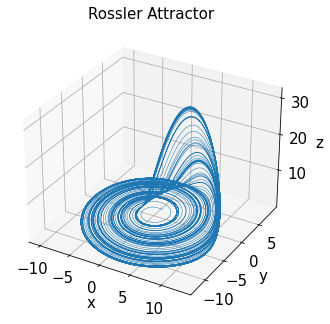

In [92]:
fig=plt.figure()
ax=Axes3D(fig)

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Rossler Attractor', fontsize=15)
plt.show()

# The Lorenz attractor
A equação de Lorenz

$$ \frac{dx}{dt} = \sigma(y-x), \frac{dy}{dt}=rx-y-xz, \frac{dz}{dt}=xy-bz $$

In [93]:
from scipy.integrate import odeint

In [94]:
# Parâmetros de Lorenz e condições iniciais
sigma, beta, rho = 10, 2.667, 28
x0, y0, z0 = 0, 1, 1.05

# Ponto de tempo máximo e número total de pontos de tempo
tmax, n = 100, 10000

In [95]:
def Lorenz(X, t, sigma, beta, rho):
    """ Equações de Lorenz"""
    x, y, z = X
    dx = -sigma * (x-y)
    dy = rho * x - y - x * z
    dz = -beta * z + x * y
    
    return dx, dy, dz

In [96]:
# Integração da equação de Lorenz
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
x, y, z = f.T

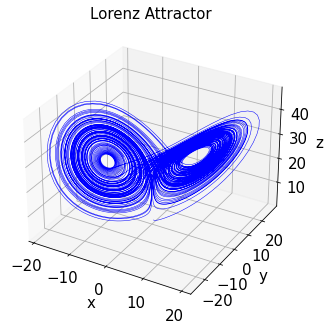

In [97]:
# Plote atrator de Lorenz usando uma projeção 3D Matplotlib
fig=plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z, 'b-', lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Lorenz Attractor', fontsize=15)
plt.show()

# Animação de uma bifurcação do circuito Chua
Chua modelou um circuito que era um oscilador simples exibindo uma variedade

$$ \frac{dv1}{dt}= \frac{G(v2-v1)-f(v1)}{C1}, \frac{dv2}{dt}= \frac{G(v1-v2)+1}{C2}, \frac{di}{dt}=-\frac{v2}{L} $$

In [98]:
from matplotlib.animation import ArtistAnimation

In [99]:
fig=plt.figure()

mo = -1/7
m1 = 2/7
tmax = 100;

def chua(x, t):
    return [a * (x[1] - (m1 * x[0] + (mo - m1) / 2 *
    (np.abs(x[0] + 1) - \
    np.abs(x[0] - 1)))), x[0] - x[1] + x[2], -15 * x[1]]

<Figure size 432x288 with 0 Axes>

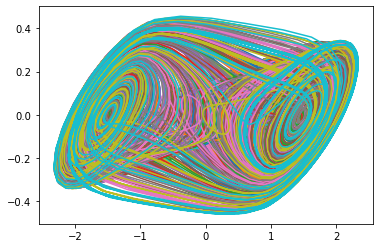

In [100]:
time = np.arange(0, tmax, 0.1)
x0=[1.96, -0.0519, -3.077]
myimages = []
for a in np.arange(8, 11, 0.1):
    xs = odeint(chua, x0, time)
    imgplot = plt.plot(xs[:, 0], xs[:, 1])
    myimages.append(imgplot)

In [101]:
my_anim = ArtistAnimation(fig, myimages, interval=500, blit=False, repeat_delay=500)
plt.show()

# Poincaré
Um gráfico de
Seçao de Poincaré é a sequência de pontos formados pelas interSeções do caminho de fase com estes planos paralelos em espaço de fase, projetados sobre um dos planos

$$ \frac{dx}{dt} = P(x,y), \frac{dy}{dt}=Q(x,y) $$

In [118]:
from sympy import sqrt
from scipy.integrate import odeint

In [119]:
xmin, xmax = -1, 1
ymin, ymax = -1, 1

In [120]:
def dx_dt(x, t):
    return [- x[1] - x[0] * sqrt(x[0]**2 + x[1]**2),
        x[0] - x[1] * sqrt(x[0]**2 + x[1]**2)]

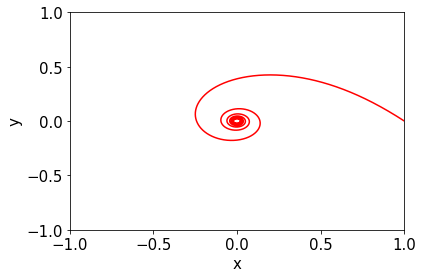

In [121]:
# fase portrait
t=np.linspace(0,16*np.pi,10000)
xs=odeint(dx_dt, [1, 0], t)
plt.plot(xs[:, 0], xs[:, 1], "r-")
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax);

In [122]:
# Os primeiros oito retornos no eixo x.
t = np.linspace(0, 9*2*np.pi, 900000)
xs = odeint(dx_dt, [1, 0], t)
for i in range(9):
    print('r{} = {}'.format(i, xs[100000*i, 0]))
plt.show()

r0 = 1.0
r1 = 0.13730247618333363
r2 = 0.0737116398245952
r3 = 0.050378946444256625
r4 = 0.03826617811397822
r5 = 0.03084905202922912
r6 = 0.02584041437408372
r7 = 0.022231002965186188
r8 = 0.019506343238878496


In [123]:
# Fase Portrait e Mapa Poincare

In [125]:
xmin, xmax = -2, 2
ymin, ymax = -2, 2
k = 0.3
omega = 1.25
gamma = 0.5

In [126]:
def dx_dt(x, t):
    return [x[1], x[0] - k * x[1] - x[0]**3 + gamma * np.cos(omega*t)]

Text(0.5, 1.0, 'Fase portrait')

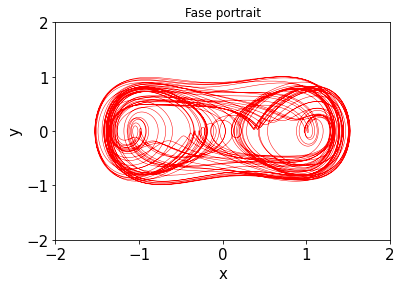

In [131]:
#fase portrait
t = np.linspace(0, 500, 10000)
xs = odeint(dx_dt, [1, 0], t)
plt.plot(xs[:, 0], xs[:, 1], "r-", lw=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax);
plt.title('Fase portrait')

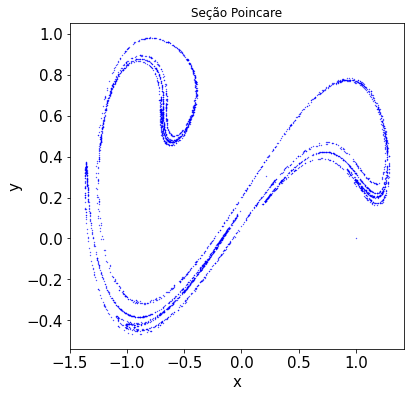

In [130]:
# seção de Poincare
x = []
y = []
fig, ax = plt.subplots(figsize=(6, 6))
t=np.linspace(0, 4000*(2*np.pi)/omega, 16000000)
xs = odeint(dx_dt, [1, 0], t)
x = [xs[4000*i, 0] for i in range(4000)]
y = [xs[4000*i, 1] for i in range(4000)]
ax.scatter(x, y, color = 'blue', s=0.1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Seção Poincare')
plt.show()